#About the data

Abstract

This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, these datasets can have an important role for research and education in revenue management, machine learning, or data mining, as well as in other fields.

The data set is from kaggle: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In addtion you can read the metadata to get more understaning of the data itself: https://www.sciencedirect.com/science/article/pii/S2352340918315191


#Import lib & load Data


In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [284]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler # לבדוק אם שומש

#visualize tree
from sklearn.tree import plot_tree

# For validation
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

#for checking if a date is a holiday
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import warnings
warnings.filterwarnings('ignore')

In [285]:
### להסביר
def visualize_tree(model, md=5, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(model,
            max_depth=md,
            feature_names=model.feature_names_in_,
            label='all',
            filled=True,
            rounded=True, 
            fontsize=8);

In [286]:
path = '/content/drive/MyDrive/Colab Notebooks/hotel_bookings.csv' 
df = pd.read_csv(path)


#Understading the data

##columns dictionary: (used columns only)

1. ***ADR:*** Average Daily Rate - Calculated by dividing the sum of all lodging transactions by the total number of staying nights

2. ***Adults:*** Number of adults	

3. ***Babies:*** Number of babies	

4. ***Children:*** Number of children	

5. ***Agent:*** ID of the travel agency that made the bookinga	

6. ***Company:*** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	

7. ***ArrivalDateMonth:*** Month of arrival date with 12 categories: “January” to “December”	

8. ***BookingChanges:*** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation	

9. ***IsRepeatedGuest:*** Value indicating if the booking name was from a repeated guest (1) or not (0)	

10. ***LeadTime:*** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date	

11. ***Meal:*** Type of meal booked. Categories are presented in standard hospitality meal packages:	

* Undefined/SC – no meal package;

* BB – Bed & Breakfast;

* HB – Half board (breakfast and one other meal – usually dinner);

* FB – Full board (breakfast, lunch and dinner)

12. ***PreviousCancellations:*** Number of previous bookings that were cancelled by the customer prior to the current booking	

13. ***RequiredCardParkingSpaceS:*** Number of car parking spaces required by the customer	

14. ***ReservedRoomType:*** Code of room type reserved. Code is presented instead of designation for anonymity reasons	

15. ***TotalOfSpecialRequests:*** Number of special requests made by the customer (e.g. twin bed or high floor)	



In [287]:
df.shape

(119390, 32)

In [288]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2707,Resort Hotel,0,0,2015,October,44,27,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,0,No Deposit,NaN,NaN,0,Transient,45.00,0,0,Check-Out,2015-10-28
98669,City Hotel,0,193,2016,September,40,30,1,2,2,0.0,0,BB,DEU,Groups,Corporate,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient-Party,132.00,0,0,Check-Out,2016-10-03
34429,Resort Hotel,0,15,2017,March,12,20,1,4,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,314.0,NaN,0,Transient,60.00,0,0,Check-Out,2017-03-25
3579,Resort Hotel,0,127,2015,December,52,24,2,5,2,0.0,0,BB,POL,Online TA,TA/TO,0,0,0,A,D,1,No Deposit,240.0,NaN,0,Transient-Party,37.29,0,1,Check-Out,2015-12-31
9088,Resort Hotel,1,53,2016,October,44,27,1,3,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,70.75,0,3,Canceled,2016-10-03


In [289]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [291]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There are some columns with na values whcih we are going to dig deeply later

#Clean Data & Feature engineering

ADR general info and cleaning

In [292]:
df[['adr']].describe()

,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


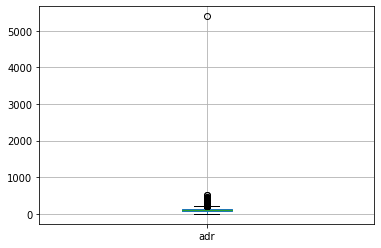

In [293]:
df[['adr']].boxplot()


As we can see there is a sample of adr 5400 which is out or the range, it seems to be an error. Let's remove it and see how this graph looks afterward.

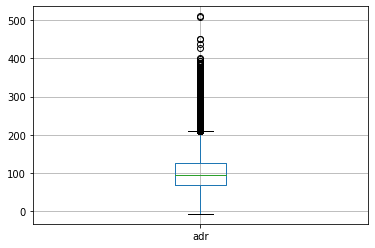

In [294]:
df = df[df.adr<5000]
df[['adr']].boxplot()

As we can see, there are still some outliers but we need to remember that we are going to predict the adr column so we cannot just remove them. 
However, we can see that there are values under 0, which doesn't make sense:

(-10.0, 50.0)

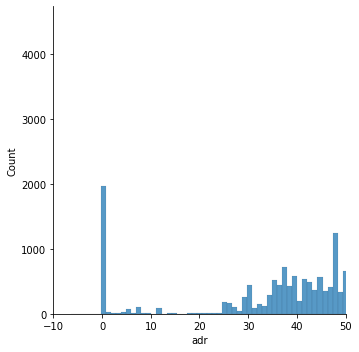

In [295]:
sns.displot(df['adr'], bins = 500)
plt.xlim(-10,50)

We can guess that under 0 is an error ( we even cannot see them in the graph) and the 0 values are a present\contract between companies\test but anyway, after checking we cannot know it with our data. So for making out data more relaibe, let's from whcih values od adr, we begin to have samples

(20.0, 30.0)

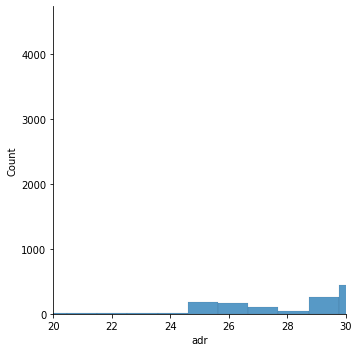

In [296]:
sns.displot(df['adr'], bins = 500)
plt.xlim(20,30)

So for making our data more reliable, let's reffer only to the results with adr over than 23. (I took 23 and not 24 only because ADR values are float type, so we want to be in the safe side). 

In [297]:
#del outliers in adr
df = df[df.adr > 23] 


As we can see at the null values table we have 4 rows with na values in the children columns. 4 values don't effect on the resutls and it deosn't worth it to check it out deeply so we can just ignore them:

In [298]:
#excluding rows with nan values in children column.
df = df[df['children'].isnull() == False]

As we can read on the metadata, the values "SC" and "unidentified" at the "meal" columns are the same, so let's checnge it in our data frame

Grouping:

In [299]:
df.loc[(df.meal == 'SC')| (df.meal == 'Undefined'), 'meal'] = 'SC_Undefined'

In [300]:
# cleaning room with babies guests only
df = df[~((df.children == 0 )& (df.adults == 0 )& (df.babies >0)) ]


#Features engineering

In [301]:
df['total_nights'] = df.stays_in_weekend_nights + df.stays_in_week_nights # new column represents number of nights in total
df['prop_weekend'] = df.stays_in_weekend_nights / df.total_nights # new column represents porportion of weekend in total nights
df['total_guests'] = df.adults + df.children + df.babies  # new column represents number of guests in total
df['is_resort'] =  df.hotel.apply(lambda x : 1 if x == 'Resort Hotel' else 0  )   # new column represents if the hoter is resort or city
df['is_company'] = df['company'].apply(lambda x: 1 if  pd.isna(x) == False else 0 )   # new column represents if the order booky by a companr or a private customer
df['booking_by_a_travel_agent'] = df['agent'].apply(lambda x: 1 if  pd.isna(x) == False else 0 )  # new column represents if the order was booked by using an travel agent or indepently.
df['is_weekend'] = df.stays_in_weekend_nights > 0 # new column represents if the order is during the weekend.

In [302]:
###making "is_holiday" column so we can check if the vacation is during a holiday.
#change month str to int
df['month_number'] = df.arrival_date_month.apply(lambda x: datetime.datetime.strptime(x,'%B').month )

#edit df for 'to_datetime' function
temp = df[['arrival_date_year','month_number','arrival_date_day_of_month']]
temp.rename({'arrival_date_year' : 'year' ,'month_number':'month' , 'arrival_date_day_of_month' : 'day'  } ,axis = 1 , inplace = True)
#create date
df['arrival_date'] = pd.to_datetime(temp)
df['arrival_year_month'] = df.arrival_date.dt.strftime('%Y-%m')

#check if date is an holiday
cal = calendar()
holidays = cal.holidays(start = min(df.arrival_date) ,end =  max(df.arrival_date))
df['is_holiday'] = df['arrival_date'].isin(holidays)

#cleaning data number 2 (after features engineering)

In [303]:
#cleaning orders with no guests.
df = df[df['total_guests'] > 0] 


In [304]:
df.total_guests.value_counts()

2.0     80961
1.0     21590
3.0     10381
4.0      3887
5.0       131
12.0        2
10.0        1
Name: total_guests, dtype: int64

As we can see we don't really have orders with more than 5 guests. 
so it'd be better to ignore them so out model won't be effectted by them.

In [305]:
#cleaning orders with more than 5 guests
df = df[df['total_guests'] <6] 

#Linear regression

#Choose Features for the model

In [306]:
"""
#split hotels into two df
df_resort = df[df.hotel == 'Resort Hotel']
df_city = df[df.hotel == 'City Hotel']

"""

"\n#split hotels into two df\ndf_resort = df[df.hotel == 'Resort Hotel']\ndf_city = df[df.hotel == 'City Hotel']\n\n"

In [307]:
#convert col 'month number' to string for dummies transformation
df.month_number = df.month_number.astype(str)

In [308]:
df_to_model = df[['is_resort' , 'month_number' , 'lead_time' ,'arrival_date_week_number' ,'distribution_channel' ,'customer_type' 
                  ,'is_company' ,'booking_by_a_travel_agent' ,'market_segment'  ,'is_holiday'  , 'previous_cancellations','previous_bookings_not_canceled'
                  ,'adults', 'children', 'babies', 'meal' ,'is_repeated_guest' , 'required_car_parking_spaces'
                , 'reserved_room_type' ,'total_nights','is_weekend', 'prop_weekend','adr']]

In [309]:
df_to_model = pd.get_dummies(df_to_model , drop_first= True)


In [310]:
X = df_to_model.drop(columns= ['adr'])
y = df_to_model.adr

split to test tran

In [311]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=123456) 

##Linear Regression

###Fit &Predict

In [312]:
First_model = LinearRegression().fit(X_train , y_train)
y_train_pred = First_model.predict(X_train)
y_test_pred = First_model.predict(X_test)

 mse_train : 30.330121913134686


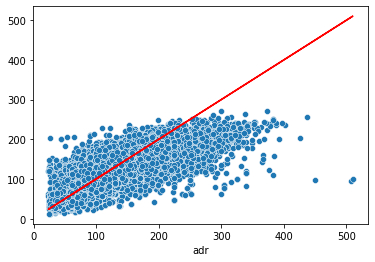

In [313]:

mse_train = mse(y_train, y_train_pred , squared= False)
print(f' mse_train : {mse_train}')
ax = sns.scatterplot(x=y_train, y=y_train_pred )
ax.plot(y_train, y_train, 'r')


###Validation

 mse_test : 30.53996888774313


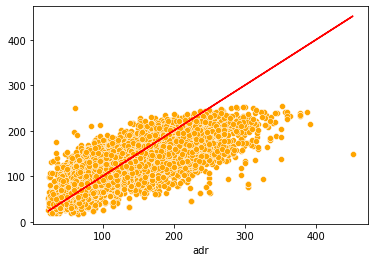

In [314]:
mse_test = mse(y_test, y_test_pred , squared= False)
print(f' mse_test : {mse_test}')
ax = sns.scatterplot(x = y_test, y = y_test_pred, color = 'orange')
ax.plot(y_test,y_test, 'r')

In [315]:
#parameters of the model
#model 0 --> city hotel
print(First_model.intercept_)
zipped = zip(X_test.columns, First_model.coef_)
zipped_sorted = sorted(zipped, key = lambda x : abs(x[1])  , reverse  = True)
zipped_sorted


43.937817388859834


[('month_number_8', 70.97265614779258),
 ('reserved_room_type_H', 70.08389926452222),
 ('reserved_room_type_G', 62.45834112380299),
 ('month_number_7', 59.58595499268084),
 ('month_number_6', 52.290465846995104),
 ('month_number_9', 50.491325683287506),
 ('reserved_room_type_F', 48.74483880548039),
 ('month_number_5', 44.19890768381419),
 ('meal_FB', 41.307817072917025),
 ('reserved_room_type_C', 39.96305918824325),
 ('market_segment_Complementary', -37.128235111991295),
 ('month_number_10', 35.7939258023384),
 ('distribution_channel_Undefined', -35.66797696968426),
 ('reserved_room_type_E', 31.437270794417095),
 ('month_number_4', 31.042478128630265),
 ('distribution_channel_GDS', 28.737464145582198),
 ('meal_HB', 25.72737539063229),
 ('month_number_12', 24.970624153636052),
 ('is_resort', -24.44594642628176),
 ('reserved_room_type_L', 23.937928950267445),
 ('month_number_11', 21.308987972228767),
 ('reserved_room_type_D', 17.30528905568991),
 ('market_segment_Online TA', 15.849499870

# During the EDA and the tests to get the best results for out model we noticed that each kind of hotel behaves deiffrently and we consider to try to split out model into two diffternt model. 
One of the most effective columns is the mounth od the arrival date. let's show that each kind of hotel behaves diffrentlt depends on the season. 

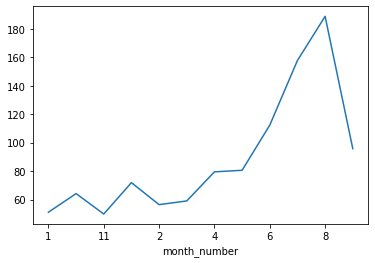

In [316]:
df[df['hotel'] == 'Resort Hotel'].groupby('month_number')['adr'].mean().plot()

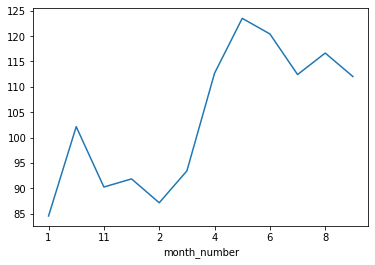

In [317]:
df[df['hotel'] == 'City Hotel'].groupby('month_number')['adr'].mean().plot()

So let's create a comlexed model that is splited into two different models. we will use this complex  model for the other regressions models.

In [318]:
class My_Model():
    def __init__(self):
        self.cat_list = []
        self.dict_exec_model = {'mlr': 'LinearRegression().fit(X_train, y_train)' ,  'knn': 'KNeighborsRegressor(n_neighbors= n_neighbors).fit(X_train, y_train)'
                                ,'tree':'DecisionTreeRegressor( min_samples_leaf = min_samples_leaf, ccp_alpha= ccp_alpha, max_leaf_nodes= max_leaf_nodes,max_depth= max_depth  ).fit(X_train, y_train)'
                                }
### models fit #####
    def fit(self, X ,y  ,model = 'mlr' ,cat='' , n_neighbors = 5
                    #parameters for tree:
                    ,min_samples_split = 2
                    ,splitter = 'best'
                    ,min_samples_leaf = 10, 
                     ccp_alpha = 0.01, 
                     max_leaf_nodes =1000,
                     max_depth =10):       
        # if cat == '' and model in ['mlr','tree','knn']:
        #     setattr(My_Model,f'{model}_general_model' , LinearRegression().fit(X_train, y_train) )
        self.cat = cat
        self.cat_list = X[cat].unique()
        for cat_v in self.cat_list:
            X_train = X.loc[X[cat] == cat_v]
            y_train = y.loc[X_train.index]
            if model == 'mlr':
                setattr(My_Model,f'mlr_{cat_v}_model' , LinearRegression().fit(X_train, y_train) )
            elif model == 'tree':
                setattr(My_Model,f'tree_{cat_v}_model' 
                       ,DecisionTreeRegressor( 
                              min_samples_split = min_samples_split ,
                              splitter = splitter ,
                              min_samples_leaf = min_samples_leaf, 
                              ccp_alpha= ccp_alpha, 
                              max_leaf_nodes= max_leaf_nodes,
                              max_depth= max_depth  ).fit(X_train, y_train) )
            else:
                 setattr( My_Model,f'knn_{cat_v}_model' , KNeighborsRegressor(n_neighbors= n_neighbors).fit(X_train, y_train) )

#####predictions #####
    def predict(self ,X ,model = 'mlr'):
         y_pred = pd.Series(name='y_pred' ,dtype = 'float64')
         for cat_v in self.cat_list:
             X_predict = X.loc[X[self.cat] == cat_v]
             cat_v_pred =  eval(f'self.{model}_{cat_v}_model.predict(X_predict)') 
             cat_v_pred = pd.Series(cat_v_pred, X_predict.index)
             y_pred = pd.concat( [y_pred , cat_v_pred] ,axis = 0 ,names=['y_pred'] )
         return y_pred    

#Linear regression using complexed model

Fit&Predict

In [319]:
lr_model = My_Model()

In [320]:
lr_model.fit(X_train , y_train ,model = 'mlr', cat = 'is_resort')

In [321]:
y_train_pred = lr_model.predict(X_train ,model = 'mlr')

In [322]:
y_train_pred = pd.Series(y_train_pred)
y_train_pred

49463      85.857139
74471      69.098350
85815      96.948476
100811    122.143772
83478      58.894085
             ...    
39027     204.742672
34106      22.997422
4544      138.328412
15970     199.038660
37342     133.814718
Length: 81865, dtype: float64

In [323]:
#sort y index
y_train_pred.sort_index(inplace=True)
y_train.sort_index(inplace = True)

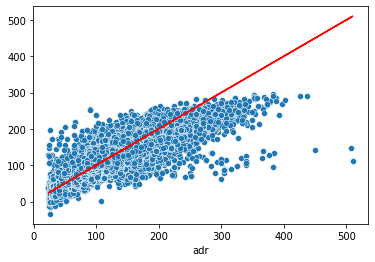

In [324]:
ax = sns.scatterplot(x=y_train, y=y_train_pred )
ax.plot(y_train, y_train, 'r')

In [325]:
mse_train = mse(y_train, y_train_pred , squared= False)
print(mse_train)

24.351962312621563


In [326]:
y_test_pred = lr_model.predict(X_test, model = 'mlr')

In [327]:
y_test_pred.sort_index(inplace=True)
y_test.sort_index(inplace=True)

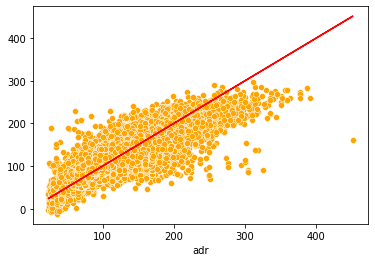

In [328]:
ax = sns.scatterplot(x=y_test, y=y_test_pred, color = 'orange')
ax.plot(y_test, y_test, 'r')

In [329]:
mse_test = mse(y_test , y_test_pred , squared= False)
print(mse_test)
#mse_difference
mse_train - mse_test

24.662866977659686


-0.3109046650381231

##Decision Tree

In [331]:
My_Model_tree = My_Model()
My_Model_tree.fit(X_train , y_train ,model ='tree' ,cat ='is_resort'
                              ,splitter = 'best'
                              ,min_samples_split = 40
                              ,min_samples_leaf=10
                              ,ccp_alpha=0.01 
                              ,max_leaf_nodes=1000
                              ,max_depth=100)




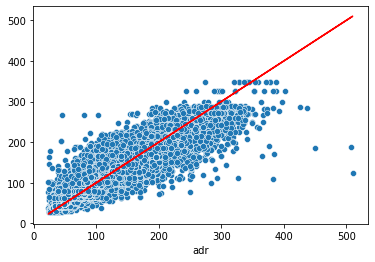

In [332]:
y_train_pred = My_Model_tree.predict(X_train ,model ='tree' )                             
#sort y index
y_train_pred.sort_index(inplace=True)
y_train.sort_index(inplace = True)
#plot
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [333]:
mse_train = mse(y_train, y_train_pred , squared= False)
print(mse_train)

17.74145965421623


Validate

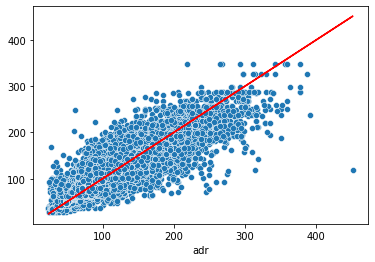

In [334]:
y_test_pred = My_Model_tree.predict(X_test , model ='tree')
#sort y index
y_test_pred.sort_index(inplace=True)
y_test.sort_index(inplace = True)
#plot
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')

In [335]:
mse_test = mse(y_test , y_test_pred , squared= False)
print(mse_test)
#mse_difference
mse_train - mse_test

19.931926912195742


-2.1904672579795132

## K-Nearest Neighbors

In [345]:
knn_model = My_Model()
knn_model.fit(X_train, y_train , model = 'knn' , cat = 'is_resort' , n_neighbors = 17)
#old way
#knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [346]:
y_train_pred = knn_model.predict(X_train , model = 'knn')

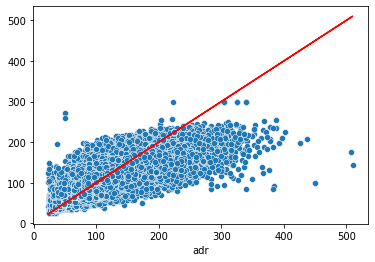

In [347]:
#sort y
y_train_pred.sort_index(inplace=True)
y_train.sort_index(inplace = True)
#plot
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [348]:
mse_train = mse(y_train, y_train_pred , squared= False)
print(mse_train)

26.632314012319988


validate

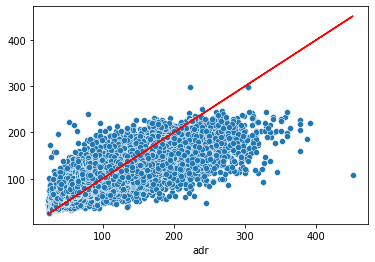

In [349]:
#test pred
y_test_pred = knn_model.predict(X_test ,model = 'knn')
#sort y
y_test_pred.sort_index(inplace=True)
y_test.sort_index(inplace = True)
#plot
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')

In [350]:
mse_test = mse(y_test , y_test_pred , squared= False)
print(mse_test)
#mse_difference
mse_train - mse_test

28.597594418398458


-1.9652804060784703